In [47]:
import os
import pickle

import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

import numpy as np


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [8]:
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)


In [9]:
data = []
labels = []

In [15]:
dict_alph={0:'a',
          1:'b',
          2:'c',
          3:'d',
           4:'e',
           5:'f',
           6:'g',
           7:'h',
           8:'i',
           9:'j',
           10:'k',
           11:'l',
           12:'m',
           13:'n',
           14:'o',
           15:'p',
           16:'q',
           17:'r',
           18:'s',
           19:'t',
           20:'u',
           21:'v',
           22:'w',
           23:'x',
           24:'y',
           25:'z',
           26:'0',
           27:'1',
           28:'2',
           29:'3',
           30:'4',
           31:'5',
           32:'6',
           33:'7',
           34:'8',
           35:'9'
          }

In [11]:
path='Data/data'

In [12]:
for j in range(26):
    d=os.path.join(path,str(j))
    image_files = [os.path.join(d, file) for file in os.listdir(d) if file.endswith(('.jpg', '.png', '.jpeg'))]
    for img_file in image_files:
        data_aux = []
        x_ = []
        y_ = []
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))
            data.append(data_aux)
            labels.append(dict_alph[j])

In [13]:
len(data)

1298

In [14]:
len(labels)

1298

In [5]:
path_numbers = 'Data/data/numbers'

In [20]:
for j in range(26,36):
    d=os.path.join(path_numbers,str(j))
    image_files = [os.path.join(d, file) for file in os.listdir(d) if file.endswith(('.jpg', '.png', '.jpeg'))]
    for img_file in image_files:
        data_aux = []
        x_ = []
        y_ = []
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))
            data.append(data_aux)
            labels.append(dict_alph[j])
    

    
    

In [21]:
len(data)

1798

In [23]:
len(labels)

1798

In [62]:
f = open('data1.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

In [24]:
import numpy as np

# Assuming 'data' is a list of sequences with varying lengths
max_length = max(len(seq) for seq in data)
padded_data = [np.pad(seq, (0, max_length - len(seq)), mode='constant') for seq in data]

x = np.asarray(padded_data)
y = np.asarray(labels)


In [34]:
x_train, x_test, y_train, y_test = train_test_split(padded_data, labels, test_size=0.2, shuffle=True, stratify=labels)

model = RandomForestClassifier()

In [35]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [36]:
y_predict = model.predict(x_test)

score = accuracy_score(y_predict, y_test)

In [37]:
score

0.9972222222222222

In [38]:
print('{}% of samples were classified correctly !'.format(score * 100))

99.72222222222223% of samples were classified correctly !


In [54]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1, decision_function_shape='ovr')


In [55]:
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [56]:
accuracy_score(y_predict, y_test)

0.9972222222222222

In [58]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(random_state=42)

In [59]:
decisionTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
y_pred = decisionTree.predict(x_test)

In [61]:
accuracy_score(y_predict, y_test)

0.9972222222222222

In [44]:
import mediapipe as mp
import numpy as np
import cv2

In [43]:
img_test = "C:/Users/Tellili Eya/Pictures/Camera Roll/WIN_20231208_11_27_57_Pro.jpg"
img = cv2.imread(img_test)
frame_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

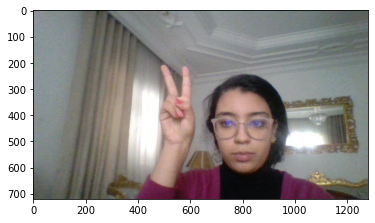

In [48]:
plt.imshow(frame_rgb)

In [49]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)


In [50]:
results = hands.process(frame_rgb)
data_aux = []
x_ = []
y_ = []
H, W, _ = img.shape
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
        img,  # image to draw
        hand_landmarks,  # model output
        mp_hands.HAND_CONNECTIONS,  # hand connections
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style())

    for hand_landmarks in results.multi_hand_landmarks:
        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y

            x_.append(x)
            y_.append(y)

        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y
            data_aux.append(x - min(x_))
            data_aux.append(y - min(y_))

    x1 = int(min(x_) * W) - 10
    y1 = int(min(y_) * H) - 10

    x2 = int(max(x_) * W) - 10
    y2 = int(max(y_) * H) - 10


In [51]:
data_aux = np.pad(data_aux, (0, 84 - len(data_aux)), mode='constant')

In [52]:
prediction = model.predict([np.asarray(data_aux)])

In [53]:
prediction

array(['x'], dtype='<U1')

In [92]:
f = open('model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()

In [64]:
import pickle
model_dict = pickle.load(open('./model.p', 'rb'))
model = model_dict['model']